In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
map = gpd.read_file('../data/AgrImOnIa/raw/AreasGeometriesWithNames.shp')
map = map.to_crs({'init': 'epsg:4326'})
map.head()

C:\Users\ritan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,field_1,MUNICIPALI,geometry
0,0,SQ125,"MULTIPOLYGON (((8.49986 45.29747, 8.50000 45.2..."
1,1,SQ145,"POLYGON ((8.58701 45.91764, 8.60000 45.92665, ..."
2,2,SQ146,"POLYGON ((8.55595 45.80004, 8.55610 45.80018, ..."
3,3,SQ147,"POLYGON ((8.59977 45.72737, 8.59848 45.72778, ..."
4,4,SQ151,"POLYGON ((8.50331 45.30019, 8.50634 45.30259, ..."


In [4]:
model_file_name = "../output/2018_high_season_year_model_30wind_10m_0.csv"
model_data = gpd.read_file(model_file_name)
model_data.head()

,PM25_original,PM25_predictions,Altitude,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_surface_pressure,WE_solar_radiation,WE_rh_min,...,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use,Municipality_Name,geometry
0,NA,-1.79587961514072,118.268634567261,7.15578355555556,1.56960111111111,2.60266666666667,0.00161415133277778,100468.111111111,9498520.55555556,52.0536111111111,...,2.54702777777778,3.15275555555556,0.278371611111111,0.00443037777777778,0.946374444444444,4.73992222222222,0.979078333333333,213,SQ125,None
1,NA,-2.9435402938684,432.649012009201,4.80601197164255,1.00100950142138,1.61042906934089,0.00346713784701955,93039.5749656355,9301129.60786673,51.7384234046787,...,2.6108376669344,5.42152368258714,1.80203580536682,0.155762309823235,1.69069263002034,1.82492698848102,2.79191000223047,311.075551219343,SQ145,None
2,NA,-10.9654072212685,372.924352598461,6.25023682043341,1.0942591525654,1.72617744671972,0.00321909080770211,95898.4862837367,9762527.50673454,51.5347802254618,...,2.97707551926498,4.68687351695402,1.61649901610621,0.111702063659377,5.88220736341005,1.68982996325092,2.92192987855289,511.958032024435,SQ146,None
3,NA,-1.02721237861846,284.352324066162,6.38178777777778,1.26090111111111,1.97186333333333,0.00285398225388889,96826.6666666667,9691116.11111111,52.0875555555556,...,4.12033888888889,6.60522777777778,1.23650833333333,0.406152777777778,8.97023888888889,1.44593333333333,2.88900555555556,112,SQ147,None
4,NA,-0.304429600479944,126.652377503471,7.19522514436254,1.63622811335404,2.7620006670684,0.00176384761691085,100113.896819329,9467809.03762217,50.9466725803669,...,0.686976535099406,1.31424894968184,0.285392708279183,6.87269583930935,9.08520505545851,4.54519931268888,0.940184251441833,213,SQ151,None


In [5]:
geometry_cols = map[["MUNICIPALI", "geometry"]]
merged_df = pd.merge(model_data, geometry_cols, left_on="Municipality_Name", right_on="MUNICIPALI", how="inner")
merged_df.drop(["MUNICIPALI", "geometry_x"], axis=1, inplace=True)
merged_df.rename(columns={"geometry_y": "geometry"}, inplace=True)

# shift back the predictions by the initial value
mean_shift = pd.to_numeric(merged_df["PM25_original"], errors="coerce").mean()
merged_df["PM25_predictions"] = pd.to_numeric(merged_df["PM25_predictions"], errors="coerce") + mean_shift

merged_df.head()

,PM25_original,PM25_predictions,Altitude,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_surface_pressure,WE_solar_radiation,WE_rh_min,...,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use,Municipality_Name,geometry
0,NA,19.839970,118.268634567261,7.15578355555556,1.56960111111111,2.60266666666667,0.00161415133277778,100468.111111111,9498520.55555556,52.0536111111111,...,2.54702777777778,3.15275555555556,0.278371611111111,0.00443037777777778,0.946374444444444,4.73992222222222,0.979078333333333,213,SQ125,"MULTIPOLYGON (((8.49986 45.29747, 8.50000 45.2..."
1,NA,18.692310,432.649012009201,4.80601197164255,1.00100950142138,1.61042906934089,0.00346713784701955,93039.5749656355,9301129.60786673,51.7384234046787,...,2.6108376669344,5.42152368258714,1.80203580536682,0.155762309823235,1.69069263002034,1.82492698848102,2.79191000223047,311.075551219343,SQ145,"POLYGON ((8.58701 45.91764, 8.60000 45.92665, ..."
2,NA,10.670443,372.924352598461,6.25023682043341,1.0942591525654,1.72617744671972,0.00321909080770211,95898.4862837367,9762527.50673454,51.5347802254618,...,2.97707551926498,4.68687351695402,1.61649901610621,0.111702063659377,5.88220736341005,1.68982996325092,2.92192987855289,511.958032024435,SQ146,"POLYGON ((8.55595 45.80004, 8.55610 45.80018, ..."
3,NA,20.608638,284.352324066162,6.38178777777778,1.26090111111111,1.97186333333333,0.00285398225388889,96826.6666666667,9691116.11111111,52.0875555555556,...,4.12033888888889,6.60522777777778,1.23650833333333,0.406152777777778,8.97023888888889,1.44593333333333,2.88900555555556,112,SQ147,"POLYGON ((8.59977 45.72737, 8.59848 45.72778, ..."
4,NA,21.331420,126.652377503471,7.19522514436254,1.63622811335404,2.7620006670684,0.00176384761691085,100113.896819329,9467809.03762217,50.9466725803669,...,0.686976535099406,1.31424894968184,0.285392708279183,6.87269583930935,9.08520505545851,4.54519931268888,0.940184251441833,213,SQ151,"POLYGON ((8.50331 45.30019, 8.50634 45.30259, ..."


C:\Users\ritan\AppData\Local\Temp\ipykernel_7628\2654501204.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df["PM25_original"].replace("NA", 0, inplace=True)


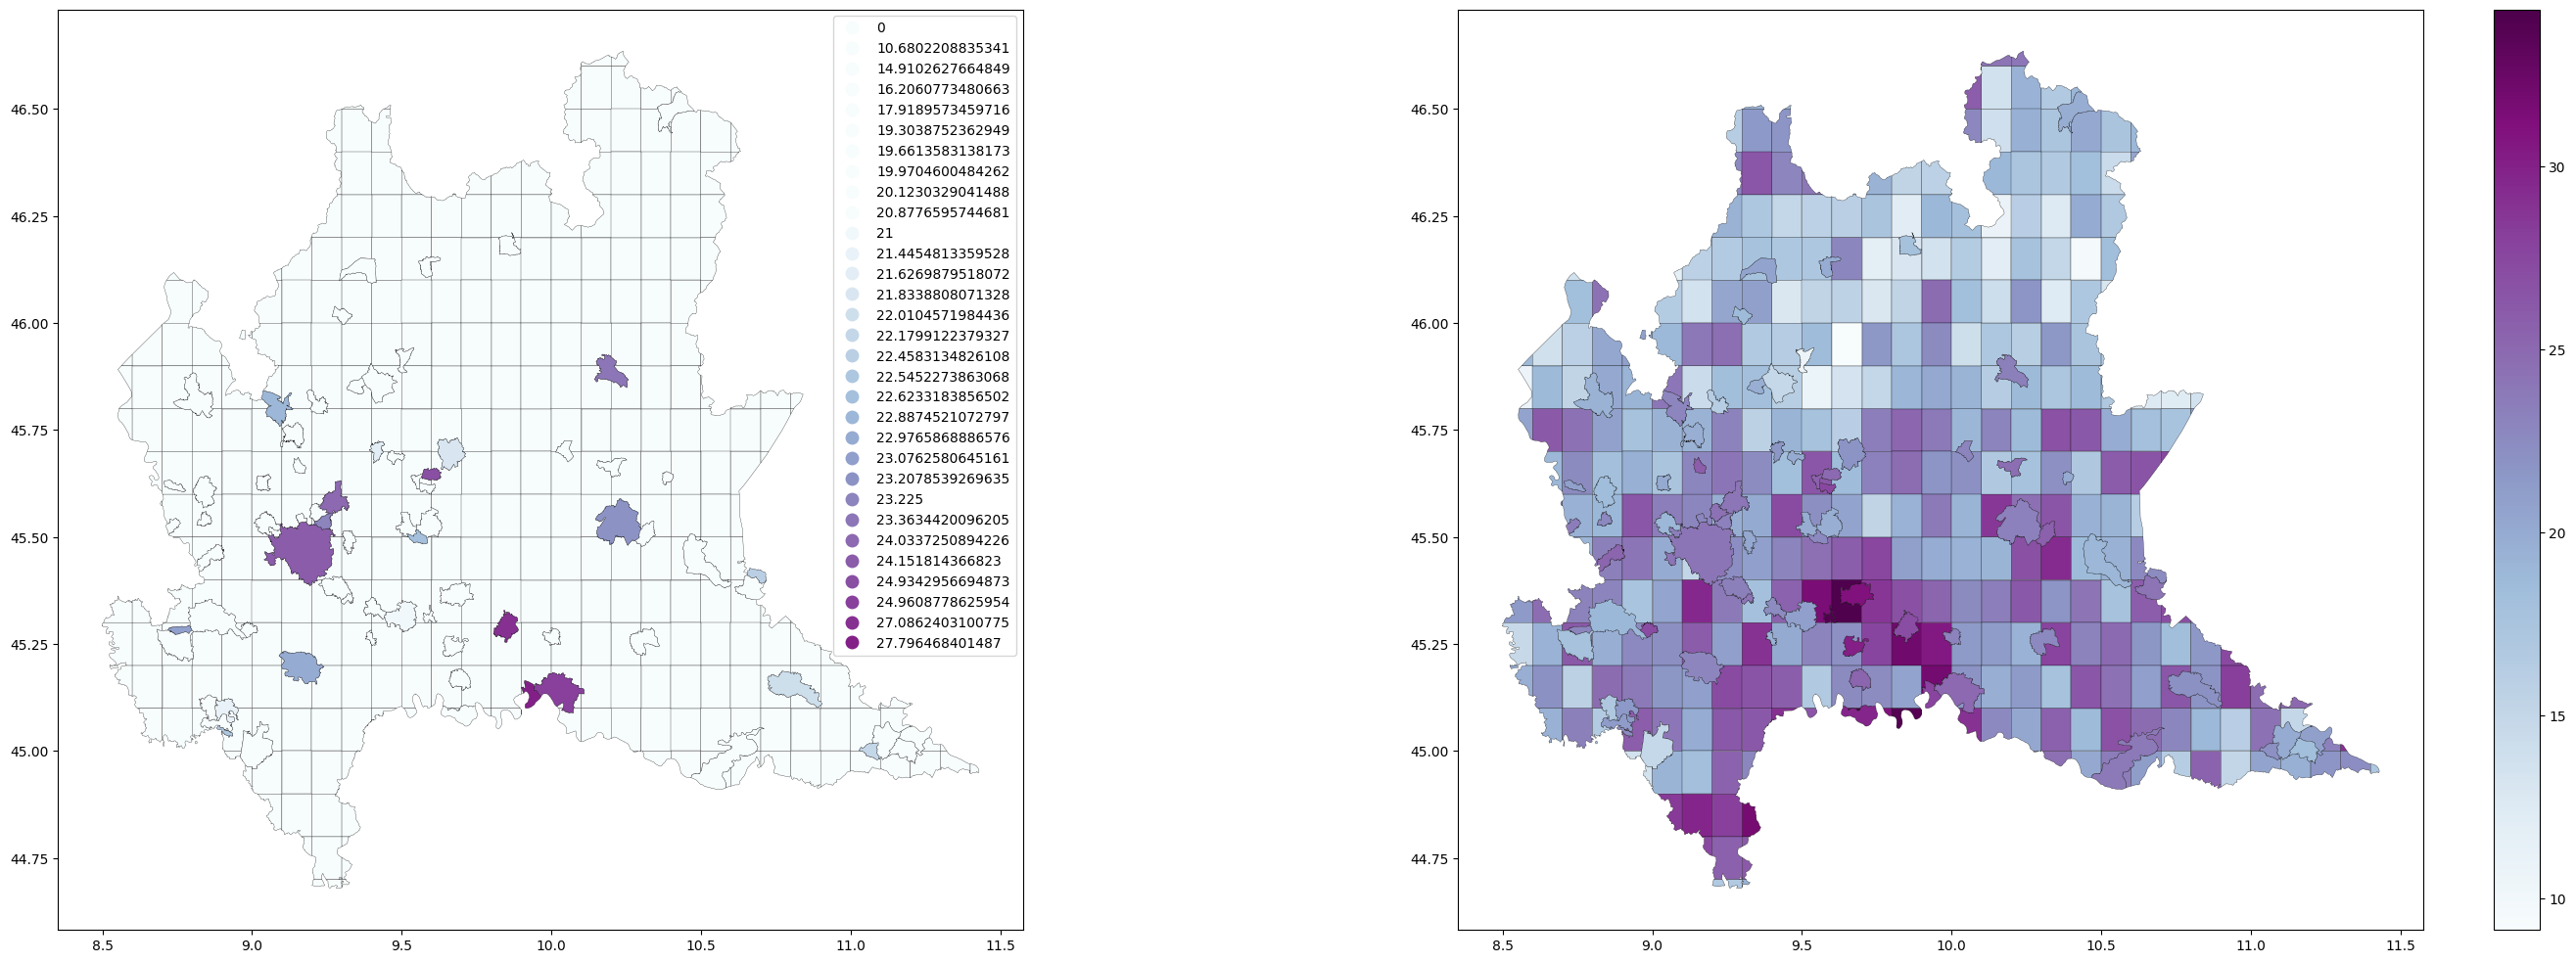

In [6]:
merged_df = merged_df.to_crs(map.crs)
cleaned_df = merged_df
cleaned_df["PM25_original"].replace("NA", 0, inplace=True)
# merged_df.plot(column="PM25_predictions", legend=True, cmap="BuPu")

min_value = min(merged_df["PM25_predictions"])
max_value = max(merged_df["PM25_predictions"])

fig, axs = plt.subplots(1, 2, figsize=(30, 10))

plt.tight_layout()
plot_values = ["PM25_original", "PM25_predictions"]
for i, ax in enumerate(axs): 
    cleaned_df.plot(
        ax=ax, 
        column=plot_values[i], 
        legend=True, 
        cmap="BuPu", 
        edgecolor='black', 
        linewidth=0.2,
        vmin=min_value,
        vmax=max_value
    )

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'EM_so2_sum'),
  Text(1, 0, 'WE_blh_layer_max'),
  Text(2, 0, 'EM_nh3_agr_soils'),
  Text(3, 0, 'WE_tot_precipitation'),
  Text(4, 0, 'WE_rh_min'),
  Text(5, 0, 'WE_wind_speed_10m_max'),
  Text(6, 0, 'LA_land_use'),
  Text(7, 0, 'WE_temp_2m'),
  Text(8, 0, 'EM_nh3_livestock_mm'),
  Text(9, 0, 'LI_bovine'),
  Text(10, 0, 'EM_nh3_sum'),
  Text(11, 0, 'EM_nh3_agr_waste_burn'),
  Text(12, 0, 'WE_wind_speed_100m_mean'),
  Text(13, 0, 'LA_lvi'),
  Text(14, 0, 'Altitude'),
  Text(15, 0, 'WE_rh_max'),
  Text(16, 0, 'EM_nox_traffic'),
  Text(17, 0, 'WE_wind_speed_10m_mean'),
  Text(18, 0, 'LI_pigs'),
  Text(19, 0, 'WE_surface_pressure'),
  Text(20, 0, 'WE_rh_mean'),
  Text(21, 0, 'WE_blh_layer_min'),
  Text(22, 0, 'WE_wind_speed_100m_max'),
  Text(23, 0, 'LA_hvi'),
  Text(24, 0, 'WE_solar_radiation'),
  Text(25, 0, 'EM_nox_sum')])

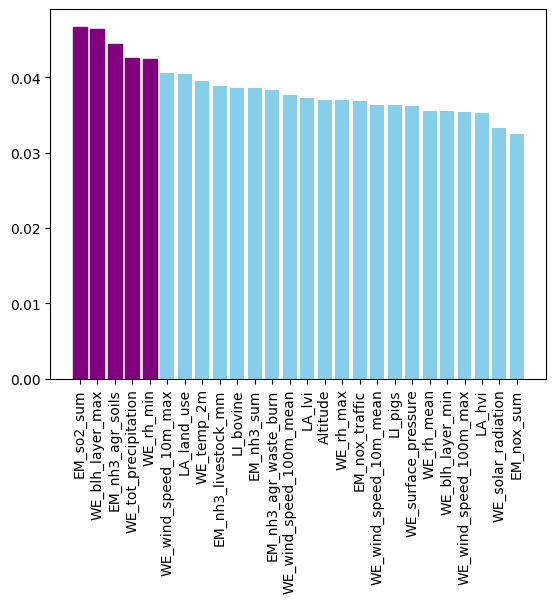

In [8]:
covariates_sel_file_name = "../output/2018_high_season_year_model_30wind_10m_0_cov_inclusion.csv"
covariates_selection = pd.read_csv(covariates_sel_file_name)

burnin = 1000
covariates_selection = covariates_selection.iloc[burnin:]
inclusion_probabilities = covariates_selection.sum(axis=0)
inclusion_probabilities = inclusion_probabilities / sum(inclusion_probabilities)

inclusion_probabilities = pd.DataFrame(inclusion_probabilities.sort_values(ascending=False))
inclusion_probabilities.columns = ["Inclusion_probability"]

bars = plt.bar(inclusion_probabilities.index, inclusion_probabilities["Inclusion_probability"], color="skyblue")

# highlight highest inclusion probabilities
for i, bar in enumerate(bars):
    if i < 5: 
        bar.set_color('purple')
        
plt.xticks(rotation=90)